# Count Vectorizer: Bag of Words on Snopes Data

In [30]:
import pandas as pd

In [31]:
data = pd.read_csv('Final Data/SnopesData5050.csv')

# data = pd.read_csv('Final Data/SnopesDataGeneric.csv',  encoding = "latin1")

# 2 -> Other / Mixture/ All other labels
# 1 -> Fake / False
# 0 -> Not Fake / True

In [32]:
data.head()

,ID,Post,Label
0,1,Sarah Silverman: Killing Jesus,Mixture
1,2,Can a Cattle Vaccine Be Used To Fight COVID-19?,FALSE
2,3,"At 191 Years Old, Mama Esifiho May be Oldest W...",Mixture
3,4,Customer Reports Finding Rat Head in Popeyes C...,Mixture
4,5,New York Police Officer Caught on Camera Rapin...,Mixture


In [33]:
# For binary classsification

label = { 'FALSE': 0, 'TRUE': 1, 'Mixture': 1 } 

data.Label = [label[item] for item in data.Label]

In [34]:
data['Label'].unique()

array([1, 0], dtype=int64)

In [35]:
data['Label'].value_counts()

0    498
1    480
Name: Label, dtype: int64

In [36]:
# Remove label from data

X = data.drop(['ID', 'Label'], axis = 1)
X.head()

,Post
0,Sarah Silverman: Killing Jesus
1,Can a Cattle Vaccine Be Used To Fight COVID-19?
2,"At 191 Years Old, Mama Esifiho May be Oldest W..."
3,Customer Reports Finding Rat Head in Popeyes C...
4,New York Police Officer Caught on Camera Rapin...


In [37]:
# Store results

Y = data['Label']
Y.head()

0    1
1    0
2    1
3    1
4    1
Name: Label, dtype: int64

In [38]:
X.shape, Y.shape

((978, 1), (978,))

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

In [40]:
# Onehot representation

messages = data.copy()

In [41]:
messages['Post'][0]

'Sarah Silverman: Killing Jesus'

In [42]:
# Stemming and stop word removal

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
#     type(messages['title'][i])
    review = re.sub('[^a-zA-Z]', ' ', str(messages['Post'][i]))
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [43]:
corpus

['sarah silverman kill jesu',
 'cattl vaccin use fight covid',
 'year old mama esifiho may oldest woman aliv',
 'custom report find rat head popey chicken',
 'new york polic offic caught camera rape girl',
 'teenag arizona coupl move chicago one day assault',
 'neg covid test result clear peopl holiday gather',
 'cdc alleg anyon enter hospit id ed covid case',
 'amish dobergoat fight ring bust',
 'diabet vaccin announc',
 'c high school ban american flag footbal game',
 'author author public legal shoot kill suspici clown',
 'non respir mask ineffect protect covid',
 'betsi devo say school plan covid outbreak happen yet',
 'vegan food left unsold covid pandem',
 'wikileak confirm hillari clinton sold weapon isi',
 'muscular cow demonstr genet engin potenti',
 'u gymnast coach bela marta karolyi illeg immigr',
 'shaun dead meme mock real ohio protest',
 'ticketmast requir event attende provid proof neg covid test',
 'savetwitt social media network shut',
 'phone number track coronaviru 

In [44]:
# Applying Count Vectorizer
# Creating the Bag of Words model

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 5000, ngram_range = (1,3))
X = cv.fit_transform(corpus).toarray()

In [45]:
Y = messages['Label']

In [46]:
# Train and Test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 0)

In [47]:
cv.get_feature_names()[:10]

['aaron',
 'abduct',
 'abduct warn',
 'abort',
 'access',
 'accur',
 'accus',
 'ad',
 'admin',
 'admin give']

In [48]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [49]:
count_data = pd.DataFrame(X_train, columns = cv.get_feature_names())

In [50]:
count_data.head()

,aaron,abduct,abduct warn,abort,access,accur,accus,ad,admin,admin give,...,zelenko success,zelenko success treat,zika,zika spray,zika spray kill,zimbabw,zone,zone covid,zone covid contain,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
import matplotlib.pyplot as plt

In [52]:
# Custom Confusion matrix plotter

def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [53]:
# Multinomial Naive Bayes

from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()

In [54]:
from sklearn import metrics
import numpy as np
import itertools

Multinomial Naive Bayes Accuracy:   0.570
Confusion matrix, without normalization


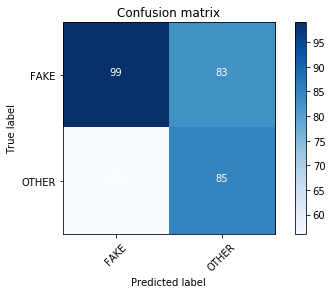

In [55]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("Multinomial Naive Bayes Accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes = ['FAKE', 'OTHER'])

In [56]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("Accuracy:    %0.3f" % score)

Accuracy:    0.570


In [57]:
# Passive Aggressive Classifier Algorithm

from sklearn.linear_model import PassiveAggressiveClassifier

linear_clf = PassiveAggressiveClassifier()

Passive Agressive Classifier Accuracy:  0.514
Confusion matrix, without normalization


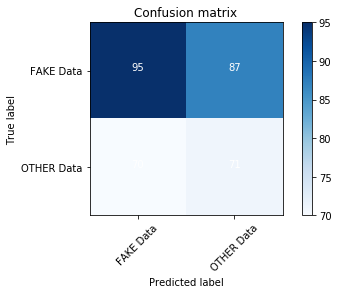

In [58]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("Passive Agressive Classifier Accuracy:  %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes = ['FAKE Data', 'OTHER Data'])

In [74]:
# Multinomial Classifier with Hyperparameter tuning

classifier = MultinomialNB(alpha = 0.1)

previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier = MultinomialNB(alpha = alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred = sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score > previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

C:\Users\Akash Selvakumar\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.0, Score : 0.68
Alpha: 0.1, Score : 0.6815384615384615
Alpha: 0.2, Score : 0.6792307692307692
Alpha: 0.30000000000000004, Score : 0.676923076923077
Alpha: 0.4, Score : 0.6723076923076923
Alpha: 0.5, Score : 0.6730769230769231
Alpha: 0.6000000000000001, Score : 0.6738461538461539
Alpha: 0.7000000000000001, Score : 0.6723076923076923
Alpha: 0.8, Score : 0.6715384615384615
Alpha: 0.9, Score : 0.6646153846153846


In [75]:
# Best: Alpha 0.1 Score = 0.681

In [76]:
# Get Features names
feature_names = cv.get_feature_names()

In [77]:
classifier.coef_[0]

array([-9.55235279, -8.80513839, -9.55235279, ..., -8.38228154,
       -8.08601572, -9.55235279])

In [78]:
# Most real
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

[(-4.378717199772515, 'covid'),
 (-4.430374907541382, 'trump'),
 (-5.423427893154132, 'clinton'),
 (-5.557214876834359, 'say'),
 (-5.7859980226907854, 'peopl'),
 (-5.812041161226805, 'obama'),
 (-5.812041161226805, 'hillari clinton'),
 (-5.812041161226805, 'hillari'),
 (-5.838780722268703, 'polic'),
 (-5.894505444106803, 'protest'),
 (-5.9235772589287805, 'vaccin'),
 (-5.984386263524387, 'us'),
 (-5.984386263524387, 'show'),
 (-5.984386263524387, 'donald trump'),
 (-5.984386263524387, 'donald'),
 (-6.118365584487865, 'presid'),
 (-6.154865986707392, 'black'),
 (-6.192749304609693, 'mask'),
 (-6.232124469844523, 'state'),
 (-6.232124469844523, 'new')]

In [79]:
# Most fake
sorted(zip(classifier.coef_[0], feature_names))[:20]

[(-9.552352788973012, 'aaron'),
 (-9.552352788973012, 'abc'),
 (-9.552352788973012, 'abduct'),
 (-9.552352788973012, 'abduct warn'),
 (-9.552352788973012, 'accept'),
 (-9.552352788973012, 'accid'),
 (-9.552352788973012, 'across'),
 (-9.552352788973012, 'actual'),
 (-9.552352788973012, 'address'),
 (-9.552352788973012, 'adolf'),
 (-9.552352788973012, 'adolf hitler'),
 (-9.552352788973012, 'advanc'),
 (-9.552352788973012, 'african american'),
 (-9.552352788973012, 'agre'),
 (-9.552352788973012, 'agre implement'),
 (-9.552352788973012, 'airlin'),
 (-9.552352788973012, 'airplan'),
 (-9.552352788973012, 'airport'),
 (-9.552352788973012, 'alert'),
 (-9.552352788973012, 'allegedli')]